To see more of these notebooks [link](https://jmsevillam.github.io/R_basics/)
#  Exampe 2: Two dices

---

Suppose you have two a fair dice, it is the same to throw a dice twice than throw two dices once, so we are going to define just a sequence of points which will correspond to a dice

In [1]:
dice=seq(1,6)
dice

[1] 1 2 3 4 5 6

We have the six options, the results of throwing the dice, can be simulated with the function `sample`

In [3]:
n_rep=10000
test1=sample(dice,n_rep,replace=T)

If we want to see the first 50 results

In [4]:
test1[1:50]

[1] 3 3 3 2 1 1 2 4 6 6 3 5 6 4 6 5 4 1 1 5 1 5 4 1 2 1 3 4 6 2 4 1 4 1 4 2 3 3
[39] 4 6 5 5 5 1 5 6 4 5 5 4

If the dice is fair, (So we are simulating correctly), we expect to have _the same_ frequencies for the six numbers. The best way yo visualze that is doing a histogram,

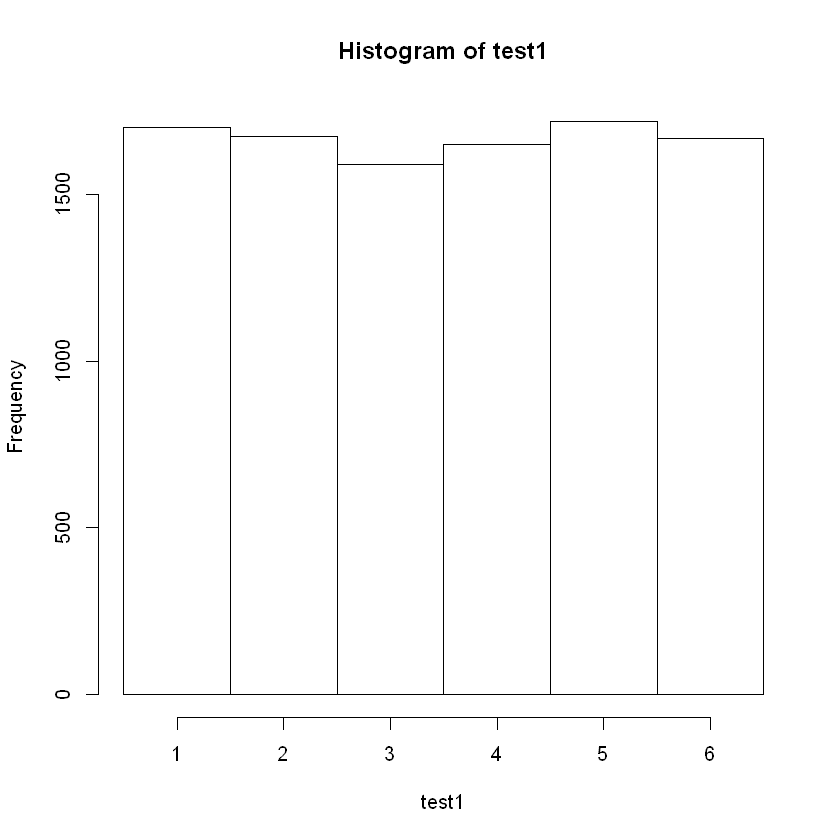

In [5]:
hist(test1,breaks = seq(0,6)+0.5)

This histogram is very particular because a difference of the ones we had done before, we are using the parameter `breaks = seq(0,6)+0.5`, the reason for that, is that `R` will choose the amount of bins it plots on the histogram, and as on our case we have discrete values it is meaningless to have more bins than values so we forced it to build the histogram counting all the values between $0.5$ and $1.5$ for the first bin, from $1.5$ to $2.5$ for the second and so on, to see more clearly this, let us plot the vector which we passed as parameter of the option `breaks`.

In [8]:
print(seq(0,6)+0.5)

[1] 0.5 1.5 2.5 3.5 4.5 5.5 6.5


We could have used a different `breaks` sequence in order to get _better_ visualization, for instance 

In [12]:
print(seq(0,6,0.5)+0.25)

 [1] 0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 4.25 4.75 5.25 5.75 6.25


In [13]:
So it look like we have thinner bars,

ERROR: Error in parse(text = x, srcfile = src): <text>:1:4: unexpected symbol
1: So it
       ^


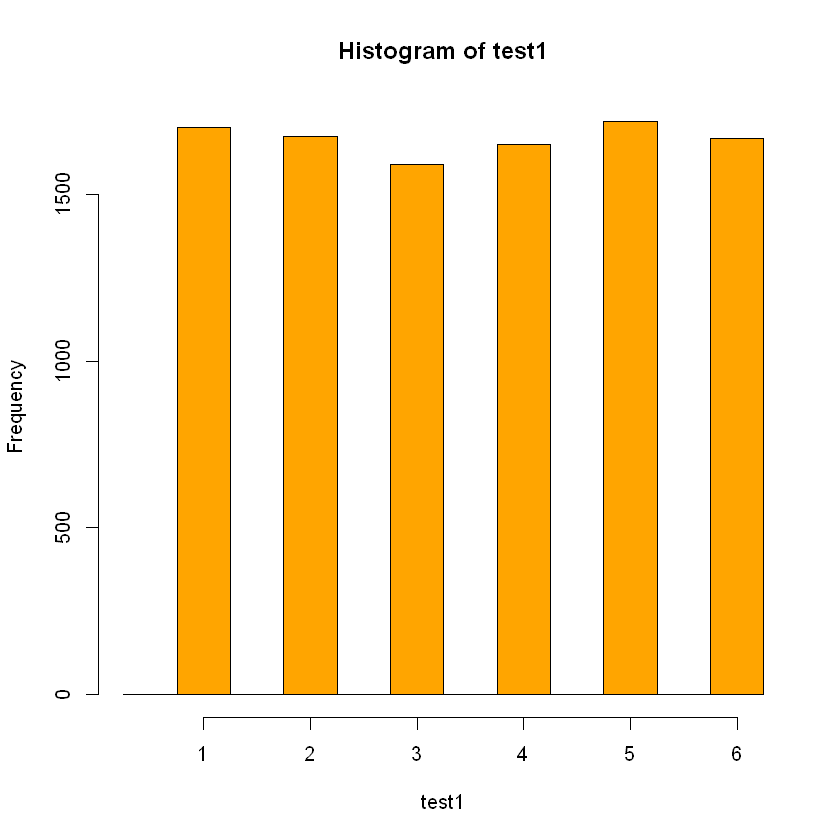

In [18]:
hist(test1,breaks = seq(0,6,0.5)+0.25,col="orange")

This plots still look very poor, but we will get to styling those plots using `ggplot`, which is bigger than just for `R`.

In [35]:
test2=sample(dice,10000,replace=T)

In [37]:
n=length(test2)
sum(test1 == 1 & test2 == 2)/n

[1] 0.0282